# Basit Doğrusal Regresyon

In [7]:
import pandas as pd

ad = pd.read_csv("Advertising.csv")
# ad = pd.read_csv("Advertising.csv", useccols = [1,2,3,4])
df = ad.copy()
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [8]:
df = df.iloc[:,1:len(df)] # index'i değişken almasından kurtulmak
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [14]:
df.isnull().values.any()

False

In [15]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


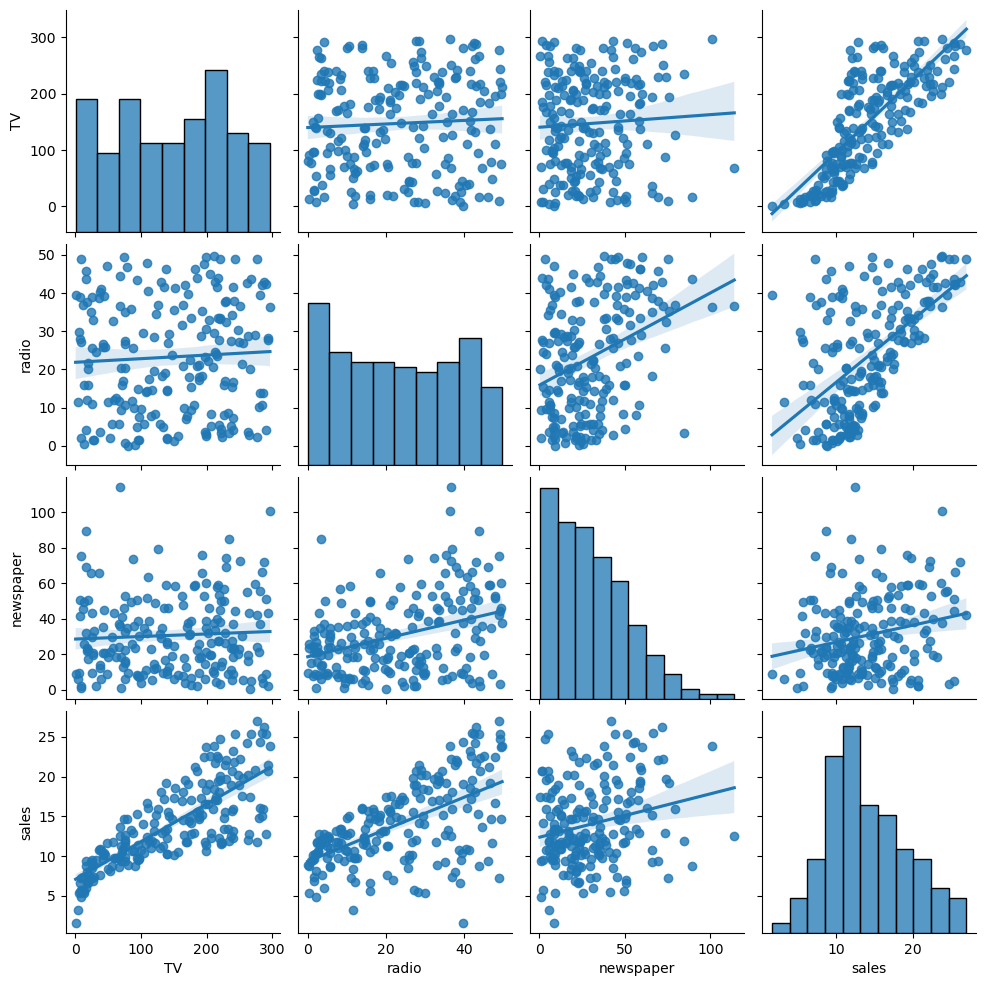

In [16]:
import seaborn as sns

sns.pairplot(df, kind = "reg");

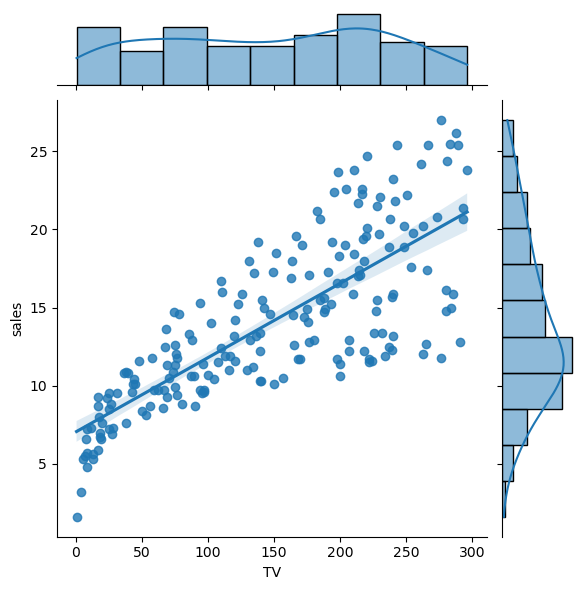

In [17]:
sns.jointplot(x = "TV", y = "sales", data = df, kind = "reg");

## Statsmodels ile Modelleme

In [20]:
import statsmodels.api as sm

In [21]:
X = df[["TV"]]
X[0:5]

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [23]:
X = sm.add_constant(X)
X[0:5]

,const,TV
0,1.0,230.1
1,1.0,44.5
2,1.0,17.2
3,1.0,151.5
4,1.0,180.8


In [24]:
y = df["sales"]
y[0:5]

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [25]:
lm = sm.OLS(y,X) # model kurma işlemi

In [27]:
model = lm.fit() # modeli fit etme

In [28]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Wed, 19 Jul 2023   Prob (F-statistic):           1.47e-42
Time:                        11:16:47   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
import statsmodels.formula.api as smf
lm = smf.ols("sales ~ TV", df)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Wed, 19 Jul 2023   Prob (F-statistic):           1.47e-42
Time:                        11:22:27   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
model.params # b0 b1

Intercept    7.032594
TV           0.047537
dtype: float64

In [32]:
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,7.0326,0.458,15.360,0.000,6.130,7.935
TV,0.0475,0.003,17.668,0.000,0.042,0.053


In [34]:
model.conf_int() # güven aralıkları %95

,0,1
Intercept,6.129719,7.935468
TV,0.042231,0.052843


In [35]:
model.f_pvalue

1.4673897001947095e-42

In [36]:
print("f_pvalue: ", "%.4f" % model.f_pvalue)

f_pvalue:  0.0000


In [37]:
print("fvalue: ", "%.2f" % model.fvalue)

fvalue:  312.14


In [38]:
print("tvalue: ", "%.2f" % model.tvalues[0:1])

tvalue:  15.36


In [39]:
model.mse_model # modelin anlamlıığı

3314.6181668686486

In [40]:
model.rsquared

0.611875050850071

In [41]:
model.rsquared_adj

0.6099148238341623

In [42]:
model.fittedvalues[0:5] # tahmin değerler

0    17.970775
1     9.147974
2     7.850224
3    14.234395
4    15.627218
dtype: float64

In [43]:
y[0:5] # gerçek değerler

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [44]:
print("Sales = " +  str("%.2f" % model.params[0]) + " + TV" + "*" + str("%.2f" % model.params[1]))

Sales = 7.03 + TV*0.05


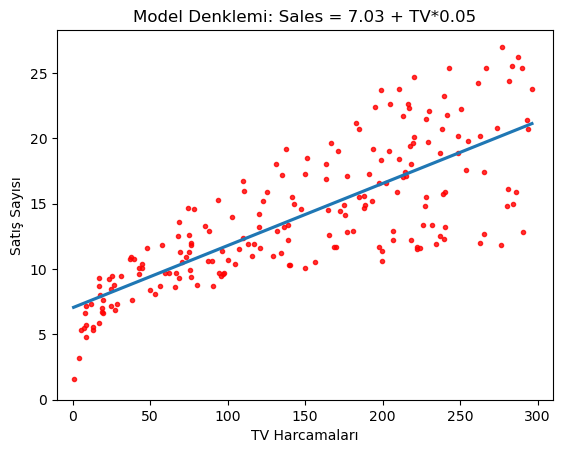

In [47]:
g = sns.regplot( x = df["TV"], y = df["sales"], ci=None, scatter_kws={'color':'r', 's':9})
g.set_title("Model Denklemi: Sales = 7.03 + TV*0.05")
g.set_ylabel("Satış Sayısı")
g.set_xlabel("TV Harcamaları")
import matplotlib.pyplot as plt
plt.xlim(-10,310)
plt.ylim(bottom=0);

## Skllearn ile Model Kurma

In [48]:
from sklearn.linear_model import LinearRegression

In [50]:
X = df[["TV"]]
y = df["sales"]
reg = LinearRegression()
model = reg.fit(X, y)
model.intercept_

7.032593549127695

In [51]:
model.coef_

array([0.04753664])

In [54]:
model.score(X,y) # r^2

0.611875050850071

In [55]:
model.predict(X)[0:10]

array([17.97077451,  9.14797405,  7.85022376, 14.23439457, 15.62721814,
        7.44616232,  9.76595037, 12.74649773,  7.44140866, 16.53041431])

## Basit Doğrusal Regresyon Model

In [56]:
7.03 + 30*0.04

8.23

In [57]:
X = df[["TV"]]
y = df["sales"]
reg = LinearRegression()
model = reg.fit(X, y)

In [58]:
model.predict([[30]])

/Users/keremkezer/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([8.45869276])

In [59]:
yeni_veri = [[5],[90],[200]]

In [60]:
model.predict(yeni_veri)

/Users/keremkezer/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([ 7.27027675, 11.31089119, 16.53992164])

## Artıklar ve Makine Öğrenmesindeki Önemi

In [61]:
from sklearn.metrics import mean_squared_error, r2_score

In [62]:
lm = smf.ols("sales ~ TV", df)
model = lm.fit()

In [63]:
mse = mean_squared_error(y, model.fittedvalues)

In [64]:
mse

10.512652915656753

In [65]:
import numpy as np
rmse = np.sqrt(mse)

In [66]:
rmse

3.2423221486546883

In [67]:
reg.predict(X)[0:10]

array([17.97077451,  9.14797405,  7.85022376, 14.23439457, 15.62721814,
        7.44616232,  9.76595037, 12.74649773,  7.44140866, 16.53041431])

In [68]:
y[0:10]

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
5     7.2
6    11.8
7    13.2
8     4.8
9    10.6
Name: sales, dtype: float64

In [69]:
k_t = pd.DataFrame({"gercek_y": y[0:10],
                   "tahmin_y": reg.predict(X)[0:10]})

In [70]:
k_t

,gercek_y,tahmin_y
0,22.1,17.970775
1,10.4,9.147974
2,9.3,7.850224
3,18.5,14.234395
4,12.9,15.627218
5,7.2,7.446162
6,11.8,9.765950
7,13.2,12.746498
8,4.8,7.441409
9,10.6,16.530414


In [71]:
k_t["hata"] = k_t["gercek_y"] - k_t["tahmin_y"]

In [72]:
k_t

,gercek_y,tahmin_y,hata
0,22.1,17.970775,4.129225
1,10.4,9.147974,1.252026
2,9.3,7.850224,1.449776
3,18.5,14.234395,4.265605
4,12.9,15.627218,-2.727218
5,7.2,7.446162,-0.246162
6,11.8,9.765950,2.034050
7,13.2,12.746498,0.453502
8,4.8,7.441409,-2.641409
9,10.6,16.530414,-5.930414


In [73]:
k_t["hata_kare"] = k_t["hata"]**2

In [74]:
k_t

,gercek_y,tahmin_y,hata,hata_kare
0,22.1,17.970775,4.129225,17.050503
1,10.4,9.147974,1.252026,1.567569
2,9.3,7.850224,1.449776,2.101851
3,18.5,14.234395,4.265605,18.195390
4,12.9,15.627218,-2.727218,7.437719
5,7.2,7.446162,-0.246162,0.060596
6,11.8,9.765950,2.034050,4.137358
7,13.2,12.746498,0.453502,0.205664
8,4.8,7.441409,-2.641409,6.977040
9,10.6,16.530414,-5.930414,35.169814


In [75]:
np.sum(k_t["hata_kare"])

92.90350329638102

In [76]:
np.mean(k_t["hata_kare"])

9.290350329638102

In [77]:
np.sqrt(np.mean(k_t["hata_kare"]))

3.048007599996775

In [78]:
model.resid[0:10]

0    4.129225
1    1.252026
2    1.449776
3    4.265605
4   -2.727218
5   -0.246162
6    2.034050
7    0.453502
8   -2.641409
9   -5.930414
dtype: float64

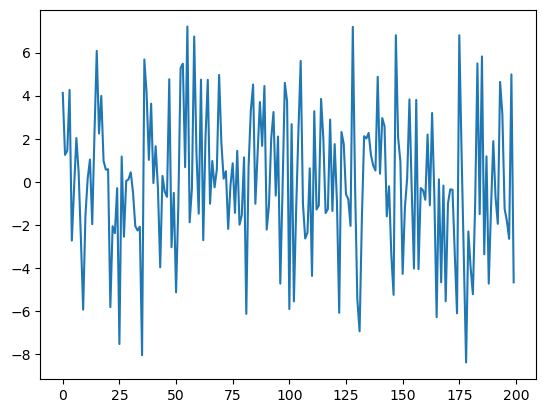

In [79]:
plt.plot(model.resid)

# Çoklu Doğrusal Regresyon¶


In [80]:
import pandas as pd
ad = pd.read_csv("Advertising.csv", usecols = [1,2,3,4])
df = ad.copy()
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [81]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

In [82]:
X = df.drop("sales", axis = 1)
y = df["sales"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state= 42)


In [83]:
X_train.shape

(160, 3)

In [84]:
y_train.shape

(160,)

In [85]:
X_test.shape

(40, 3)

In [86]:
y_test.shape

(40,)

In [87]:
training = df.copy()

In [88]:
training.shape

(200, 4)

## Statsmodels

In [89]:
lm = sm.OLS(y_train, X_train)

In [90]:
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  sales   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.982
Method:                 Least Squares   F-statistic:                              2935.
Date:                Wed, 19 Jul 2023   Prob (F-statistic):                   1.28e-137
Time:                        12:10:15   Log-Likelihood:                         -336.65
No. Observations:                 160   AIC:                                      679.3
Df Residuals:                     157   BIC:                                      688.5
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TV             0.0531      0.001     36.467      0.000       0.050       0.056
radio          0.2188      0.011     20.138      0.000       0.197       0.240
newspaper      0.0239      0.008      3.011      0.003       0.008       0.040
==============================================================================
Omnibus:                       11.405   Durbin-Watson:                   1.895
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               15.574
Skew:                          -0.432   Prob(JB):                     0.000415
Kurtosis:                       4.261   Cond. No.                         13.5
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [91]:
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
TV,0.0531,0.001,36.467,0.000,0.050,0.056
radio,0.2188,0.011,20.138,0.000,0.197,0.240
newspaper,0.0239,0.008,3.011,0.003,0.008,0.040


## scikit-learn model

In [92]:
lm = LinearRegression()
model = lm.fit(X_train, y_train)

In [93]:
model.intercept_

2.979067338122629

In [94]:
model.coef_

array([0.04472952, 0.18919505, 0.00276111])

## Tahmin

Model denklemi:

Sales = 2.97 + TV0.04 + radio0.18 + newspaper*0.002

Örneğin 30 birim TV harcaması, 10 birim radio harcamasi, 40 birimde gazete harcaması olduğunda satışların tahmini değeri ne olur?



In [95]:
yeni_veri = [[30], [10],[40]]
yeni_veri = pd.DataFrame(yeni_veri).T

In [96]:
model.predict(yeni_veri)

/Users/keremkezer/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([6.32334798])

In [97]:
rmse = np.sqrt(mean_squared_error(y_train, model.predict(X_train)))

In [98]:
rmse

1.644727765644337

In [99]:
rmse = np.sqrt(mean_squared_error(y_test, model.predict(X_test)))

In [100]:
rmse

1.78159966153345

## Model Tuning / Model Doğrulama

In [102]:
# daha doğru hatallar elde etmek için kullanıyoruz (cross validation kulanılır)

In [103]:
X = df.drop('sales', axis=1)
y = df["sales"]
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state=144)
lm = LinearRegression() 
model = lm.fit(X_train, y_train)

In [104]:
np.sqrt(mean_squared_error(y_train, model.predict(X_train)))

1.6748559274650712

In [105]:
np.sqrt(mean_squared_error(y_test, model.predict(X_test)))

1.6640263686701031

In [106]:
model.score(X_train, y_train)

0.8971614078663419

In [107]:
cross_val_score(model, X_train, y_train, cv = 10, scoring = "r2").mean()

0.8733783298422942

In [108]:
np.sqrt(-cross_val_score(model, 
                X_train, 
                y_train, 
                cv = 10, 
                scoring = "neg_mean_squared_error")).mean()

1.6649345607872932

In [109]:
np.sqrt(-cross_val_score(model, 
                X_test, 
                y_test, 
                cv = 10, 
                scoring = "neg_mean_squared_error")).mean()

1.7399924960346644

# PCR Model

In [110]:
#Değişknelere boyut indirgeme uygulandıktan sonra çıkan bileşenlere regresyon modeli kurulması fikrine dayanır

In [111]:
import pandas as pd
import numpy as np
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 1 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      263 non-null    int64  
 1   Hits       263 non-null    int64  
 2   HmRun      263 non-null    int64  
 3   Runs       263 non-null    int64  
 4   RBI        263 non-null    int64  
 5   Walks      263 non-null    int64  
 6   Years      263 non-null    int64  
 7   CAtBat     263 non-null    int64  
 8   CHits      263 non-null    int64  
 9   CHmRun     263 non-null    int64  
 10  CRuns      263 non-null    int64  
 11  CRBI       263 non-null    int64  
 12  CWalks     263 non-null    int64  
 13  League     263 non-null    object 
 14  Division   263 non-null    object 
 15  PutOuts    263 non-null    int64  
 16  Assists    263 non-null    int64  
 17  Errors     263 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  263 non-null    object 
dtypes: float64

In [113]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AtBat,263.0,403.642586,147.307209,19.0,282.5,413.0,526.0,687.0
Hits,263.0,107.828897,45.125326,1.0,71.5,103.0,141.5,238.0
HmRun,263.0,11.619772,8.757108,0.0,5.0,9.0,18.0,40.0
Runs,263.0,54.745247,25.539816,0.0,33.5,52.0,73.0,130.0
RBI,263.0,51.486692,25.882714,0.0,30.0,47.0,71.0,121.0
Walks,263.0,41.114068,21.718056,0.0,23.0,37.0,57.0,105.0
Years,263.0,7.311787,4.793616,1.0,4.0,6.0,10.0,24.0
CAtBat,263.0,2657.543726,2286.582929,19.0,842.5,1931.0,3890.5,14053.0
CHits,263.0,722.186312,648.199644,4.0,212.0,516.0,1054.0,4256.0
CHmRun,263.0,69.239544,82.197581,0.0,15.0,40.0,92.5,548.0


In [114]:
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
dms.head()

,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
1,0,1,0,1,0,1
2,1,0,0,1,1,0
3,0,1,1,0,0,1
4,0,1,1,0,0,1
5,1,0,0,1,1,0


In [115]:
y = df["Salary"]

In [116]:
X_ = df.drop(["Salary","League","Division","NewLeague"], axis = 1).astype("float64")

In [117]:
X_.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0
5,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0


In [118]:
X = pd.concat([X_, dms[["League_N", "Division_W","NewLeague_N"]]], axis = 1)
X.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0,1,1,1
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0,0,1,0
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0,1,0,1
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0,1,0,1
5,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0,0,1,0


In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25, 
                                                    random_state=42)

print("X_train", X_train.shape)

print("y_train",y_train.shape)

print("X_test",X_test.shape)

print("y_test",y_test.shape)

training = df.copy()

print("training", training.shape)

X_train (197, 19)
y_train (197,)
X_test (66, 19)
y_test (66,)
training (263, 20)


In [120]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale 
pca = PCA()

In [121]:
X_reduced_train = pca.fit_transform(scale(X_train))

In [122]:
X_reduced_train[0:1,:]

array([[-2.49569913e+00, -3.37762397e-01,  7.06391950e-01,
        -1.32791025e+00, -8.21824333e-01, -6.62790677e-01,
        -6.56764789e-01,  3.68093279e-02, -2.03665105e-01,
         1.76134815e-01, -9.20131987e-02,  2.40129020e-01,
        -3.60473661e-03, -3.41246327e-02,  4.32799605e-02,
         1.02996923e-01,  3.70733348e-03,  1.37933445e-03,
        -6.63814471e-03]])

In [123]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals = 4)*100)[0:5]

array([38.18, 59.88, 70.88, 78.88, 84.18])

In [124]:
lm = LinearRegression()

In [125]:
pcr_model = lm.fit(X_reduced_train, y_train)

In [126]:
pcr_model.intercept_

543.4834416243655

In [127]:
pcr_model.coef_

array([ 111.13977427,  -29.34209502,   26.29799759,  -38.47549852,
        -56.9200785 ,   54.44779423,   40.77493384,  -23.72746012,
          9.31198164,   13.02031672,   45.58357748,   31.97791627,
         18.93930958, -115.60940171,   24.00382778,  415.70806202,
       -449.51779543,  563.07375399,  302.53718462])

## Tahmin

In [128]:
y_pred = pcr_model.predict(X_reduced_train)

In [129]:
y_pred[0:5]

array([377.44484744, 802.19452124, 495.60987745, 112.53177731,
       426.21613066])

In [130]:
np.sqrt(mean_squared_error(y_train, y_pred))

289.3292825564976

In [131]:
df["Salary"].mean()

535.9258821292775

In [132]:
r2_score(y_train, y_pred)

0.5770075250410179

In [133]:
pca2 = PCA()

In [134]:
X_reduced_test = pca2.fit_transform(scale(X_test))

In [135]:
y_pred = pcr_model.predict(X_reduced_test)

In [136]:
np.sqrt(mean_squared_error(y_test, y_pred))

405.15753641499634

## Model Tuning

In [137]:
lm = LinearRegression()
pcr_model = lm.fit(X_reduced_train[:,0:10], y_train)
y_pred = pcr_model.predict(X_reduced_test[:,0:10])
print(np.sqrt(mean_squared_error(y_test, y_pred)))

390.79142556822234


In [138]:
from sklearn import model_selection

In [139]:
cv_10 = model_selection.KFold(n_splits = 10,
                             shuffle = True,
                             random_state = 1)

In [140]:
lm = LinearRegression()

In [141]:
RMSE = []

In [142]:
for i in np.arange(1, X_reduced_train.shape[1] + 1):
    
    score = np.sqrt(-1*model_selection.cross_val_score(lm, 
                                                       X_reduced_train[:,:i], 
                                                       y_train.ravel(), 
                                                       cv=cv_10, 
                                                       scoring='neg_mean_squared_error').mean())
    RMSE.append(score)

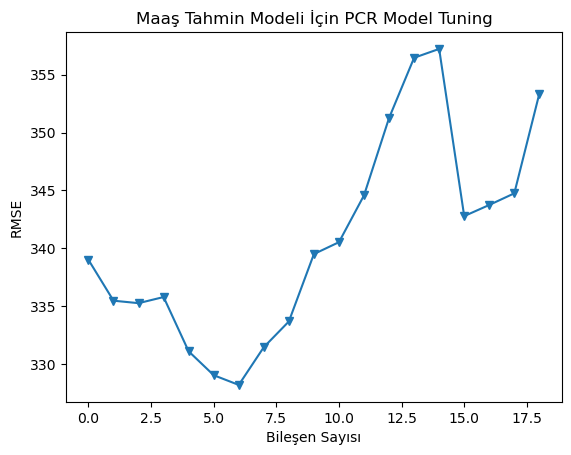

In [143]:
plt.plot(RMSE, '-v')
plt.xlabel('Bileşen Sayısı')
plt.ylabel('RMSE')
plt.title('Maaş Tahmin Modeli İçin PCR Model Tuning');

In [144]:
lm = LinearRegression()

In [145]:
pcr_model = lm.fit(X_reduced_train[:,0:6], y_train)

In [146]:
y_pred = pcr_model.predict(X_reduced_train[:,0:6])

In [147]:
print(np.sqrt(mean_squared_error(y_train, y_pred)))

308.82659830945016


In [148]:
y_pred = pcr_model.predict(X_reduced_test[:,0:6])

In [149]:
print(np.sqrt(mean_squared_error(y_test, y_pred)))

393.1198700096223


# PLS

In [165]:
# Değişkenlerin daha az sayıda ve aralarında çokllu doğrusal bağlantı problemi olmayan bileşenlere indirgenip regresyon
#modeli kurulması fikrine dayanır

## Model

In [150]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
ms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [151]:
from sklearn.cross_decomposition import PLSRegression, PLSSVD

In [152]:
pls_model = PLSRegression().fit(X_train, y_train)

In [153]:
pls_model.coef_

/Users/keremkezer/anaconda3/lib/python3.10/site-packages/sklearn/cross_decomposition/_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


array([[ 35.32916493],
       [ 48.83425857],
       [ 18.50240933],
       [ 39.28117603],
       [ 30.59952998],
       [ 40.03398345],
       [ 16.85990516],
       [ 28.22289896],
       [ 32.73784993],
       [ 22.00875744],
       [ 33.60903032],
       [ 30.39402522],
       [ 25.73279799],
       [ 54.98835148],
       [  6.56590871],
       [ -0.90894359],
       [ 17.60903423],
       [-37.24246339],
       [ 14.69680385]])

## Tahmin

In [154]:
X_train.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
183,328.0,91.0,12.0,51.0,43.0,33.0,2.0,342.0,94.0,12.0,51.0,44.0,33.0,145.0,59.0,8.0,1,0,1
229,514.0,144.0,0.0,67.0,54.0,79.0,9.0,4739.0,1169.0,13.0,583.0,374.0,528.0,229.0,453.0,15.0,1,0,1
286,593.0,152.0,23.0,69.0,75.0,53.0,6.0,2765.0,686.0,133.0,369.0,384.0,321.0,315.0,10.0,6.0,0,1,0
102,233.0,49.0,2.0,41.0,23.0,18.0,8.0,1350.0,336.0,7.0,166.0,122.0,106.0,102.0,132.0,10.0,0,0,0
153,341.0,95.0,6.0,48.0,42.0,20.0,10.0,2964.0,808.0,81.0,379.0,428.0,221.0,158.0,4.0,5.0,1,1,1


In [155]:
pls_model.predict(X_train)[0:10]

array([[344.91941493],
       [848.87070769],
       [692.93622642],
       [185.56577984],
       [435.49196077],
       [987.49530026],
       [120.63097106],
       [289.9263406 ],
       [663.41886918],
       [817.90486641]])

In [156]:
y_pred = pls_model.predict(X_train)

In [157]:
np.sqrt(mean_squared_error(y_train, y_pred))

310.1167593109696

In [158]:
r2_score(y_train, y_pred)

0.5140424486535481

In [159]:
y_pred = pls_model.predict(X_test)

In [160]:
np.sqrt(mean_squared_error(y_test, y_pred))

398.09956327448526

## Model Tuning

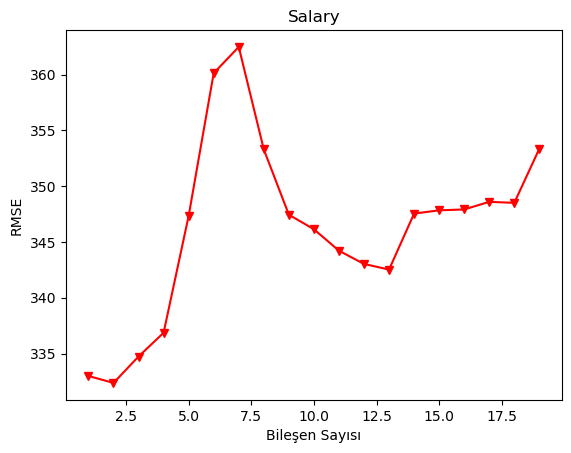

In [161]:
#CV
cv_10 = model_selection.KFold(n_splits=10, shuffle=True, random_state=1)


#Hata hesaplamak için döngü
RMSE = []

for i in np.arange(1, X_train.shape[1] + 1):
    pls = PLSRegression(n_components=i)
    score = np.sqrt(-1*cross_val_score(pls, X_train, y_train, cv=cv_10, scoring='neg_mean_squared_error').mean())
    RMSE.append(score)

#Sonuçların Görselleştirilmesi
plt.plot(np.arange(1, X_train.shape[1] + 1), np.array(RMSE), '-v', c = "r")
plt.xlabel('Bileşen Sayısı')
plt.ylabel('RMSE')
plt.title('Salary');

In [162]:
pls_model = PLSRegression(n_components = 2).fit(X_train, y_train)

In [163]:
y_pred = pls_model.predict(X_test)

In [164]:
np.sqrt(mean_squared_error(y_test, y_pred))

398.09956327448526

# ElasticNet Regresyonu

In [225]:
# Amaç hata kareler topamını minimizez eden katsayıları bu katsayılara bir ceza uygulayarak bulmaktır

In [208]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
ms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)




In [209]:
from sklearn.linear_model import ElasticNet

In [210]:
enet_model = ElasticNet().fit(X_train, y_train)

/Users/keremkezer/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.488e+06, tolerance: 3.899e+03
  model = cd_fast.enet_coordinate_descent(


In [211]:
enet_model.coef_

array([ -1.86256172,   8.70489065,   5.10426375,  -2.89875799,
        -1.28642985,   5.24343682,   6.04480276,  -0.14701495,
        -0.21566628,  -0.7897201 ,   1.80813117,   0.80914508,
        -0.61262382,   0.26816203,   0.27172387,  -0.36530729,
        19.2186222 , -31.16586592,   8.98369938])

In [212]:
enet_model.intercept_

-6.465955602112331

## Tahmin

In [213]:
enet_model

ElasticNet()

In [214]:
enet_model.predict(X_test)

array([ 577.79111731,  617.33202224, 1031.39113156,  364.95861575,
        489.51894393,  300.74185842,  604.522666  ,  465.34678732,
        901.44473965,  703.20357123,  702.9157117 ,  931.50283407,
        184.87939803,  385.14973787,  325.38944176,  546.99346574,
        774.28001821,  101.83114992, 1250.86758812,  370.67651244,
        442.05734523,  781.17288513,  578.63736538,  609.31927808,
        608.31719597,  227.46556223,  921.85505228,  301.1202457 ,
        386.31721051,  133.61143326,  162.28505608,   88.29793182,
        359.9068418 ,  422.51268445,  265.8663769 ,  355.70450908,
       1329.36312363,  125.05506935,   82.74580002,  269.17483075,
        117.13319397,  274.13484779,  648.4957249 ,  409.47065999,
        846.27919406,  712.04817644,  341.10596674,  368.24259678,
        305.70477656,  680.05724792,  716.13640636,  295.93204262,
        773.06445823,  249.28224916,  221.46794589,  541.2713245 ,
        611.50212372,  770.80228024,  168.45143906, 1159.05660

In [215]:
y_pred = enet_model.predict(X_test)

In [216]:
np.sqrt(mean_squared_error(y_test, y_pred))

357.1676548181246

In [217]:
r2_score(y_test, y_pred)

0.41070222469326867

## Model Tuning

In [218]:
from sklearn.linear_model import ElasticNetCV

In [219]:
enet_cv_model = ElasticNetCV(cv = 10, random_state = 0).fit(X_train, y_train)

In [220]:
enet_cv_model.alpha_

5230.7647364798695

In [221]:
enet_cv_model

ElasticNetCV(cv=10, random_state=0)

In [222]:
enet_tuned = ElasticNet(alpha = enet_cv_model.alpha_).fit(X_train,y_train)

In [223]:
y_pred = enet_tuned.predict(X_test)

In [224]:
np.sqrt(mean_squared_error(y_test, y_pred))

394.15280563218795